In [3]:
"""Car:
    *noun* = variables
    ideal cruzing speed
    % break chance
    rate accelerate
    current speed
    
    *verb* = functions
    accelerate
    decelerate
    car in front
    
    *collaborator*
    road
    car in front
    """

colour_list = ["red", "blue"]

In [151]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Car():
    
    def __init__(self, max_kph = 120, current_speed = 0, car_length = 5,
                start_location = 0, in_front = None, course_length = 1000):
        self.max_kph = max_kph
        self.current_speed = current_speed
        self.car_length = car_length
        self.location = start_location
        self.in_front = in_front
        self.course_length = course_length
    
    @property
    def move_forward(self):
        self.change_velocity()
        self.location += self.current_speed
        if self.location > self.course_length:
            self.location = self.course_length % 1000
    
    @property
    def translate_max(self):
        return self.max_kph / 3.6
    
    def accelerate(self):
        if self.current_speed < self.translate_max:
            self.current_speed += 2
    
    def can_decelerate(self):
        if random.random() <= .1:
            return True
        return False
    
    def decelerate(self):
        if self.current_speed > 0:
            self.current_speed -= 2
        
    def change_velocity(self):
        if self.too_close():
            return self.breaks()
        elif self.distance_check():
            self.keep_distance()
        elif self.can_decelerate():
            self.decelerate()
        else:
            self.accelerate()
            
    def too_close(self):
        future_location = self.location + self.current_speed + 6
        if future_location > self.course_length:
            future_location -= self.course_length
        if future_location > self.in_front.location + self.in_front.current_speed + (self.course_length - 200):
            return False
        if future_location > self.in_front.location + self.in_front.current_speed:
            return True
        else:
            return False
        
    def breaks(self):
        self.current_speed = 0
            
    def distance_check(self):
        distance = self.in_front.location - (self.location + 6)
        if distance < 0:
            distance += self.course_length
        if distance <= self.current_speed:
            return True
        else:
            return False
            
    def keep_distance(self):
        self.current_speed = self.in_front.current_speed

In [147]:
class Road():
    
    def __init__(self, road_length = 1000):
        self.road_length = road_length

In [148]:
class Simulation:
    
    def __init__(self, num_cars = 30, length = 1000):
        self.num_cars = num_cars
        self.length = length
        self.cars = self.create_cars(self.num_cars)
    
    def create_cars(self, num_cars):
        cars = []
        locations = np.linspace(0, self.length - 33, num_cars)[::-1]
        old_car = None
        for num in range(num_cars):
            new_car = Car(start_location = locations[num],
                          in_front = old_car)
            cars.append(new_car)
            old_car = new_car
            cars[0].in_front = cars[-1]
        return cars
    
    def simulate(self):
        for car in self.cars:
            car.move_forward
        
            
    def run_simulation(self, times = 60):
        full_report = []
        time_slace = []
        for _ in range(times):
            full_report.append(self.report)
            time_slace = [[x] * len(self.cars) for x in range(times)]
            self.simulate()
        return full_report, time_slace
    
    @property
    def report(self):
        return [car.location for car in self.cars][::-1]
    
    def scatter(self, rounds = 60):
        x, y = self.run_simulation(times = rounds)
        return plt.scatter(x, y, c = ["red", "blue"], marker = "|")

In [95]:
simulation = Simulation()

In [36]:
% matplotlib inline

In [93]:
simulation.simulate()

In [94]:
print(simulation.report)

[516.0, 515.34482758620686, 516.68965517241372, 510.0344827586207, 581.37931034482756, 644.72413793103442, 658.06896551724139, 695.41379310344826, 804.75862068965512, 718.10344827586209, 771.44827586206895, 800.79310344827582, 746.13793103448279, 831.48275862068965, 860.82758620689651, 922.17241379310349, 923.51724137931035, 916.86206896551721, 830.20689655172418, 154, 164, 168, 238, 300, 320, 354, 370, 418, 480, 476]


[612.0, 618.38983050847457, 622.77966101694915, 647.16949152542372, 653.5593220338983, 663.94915254237287, 688.33898305084745, 696.72881355932202, 701.11864406779659, 721.50847457627117, 727.89830508474574, 742.28813559322032, 750.67796610169489, 771.06779661016958, 779.45762711864404, 787.84745762711873, 792.23728813559319, 796.62711864406788, 807.01694915254234, 811.40677966101703, 815.79661016949149, 820.18644067796617, 832.57627118644064, 840.96610169491532, 845.3559322033899, 849.74576271186447, 856.13559322033905, 864.52542372881362, 876.9152542372882, 881.30508474576277, 923.69491525423734, 944.08474576271192, 960.47457627118649, 966.86440677966107, 971.25423728813564, 999.64406779661022, 66, 74, 80, 184, 202, 210, 252, 252, 340, 358, 364, 408, 434, 442, 450, 462, 482, 490, 500, 506, 512, 546, 556, 568]


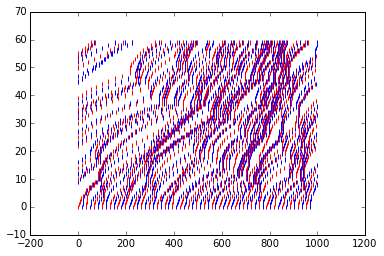

In [160]:
simulation = Simulation(num_cars = 60)
print(simulation.scatter(60))
print(simulation.report)

In [51]:
66 <= 39

False